<a href="https://colab.research.google.com/github/CarlosBaez11/Transferencia_de_calor/blob/main/Metodos_Transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
class aleta():

    def __init__(self, l_centro=5, ancho=21, alto=13):
        self.l_centro=l_centro
        self.ancho=ancho
        self.alto=alto

    def params(self,t_amb=305, delta_x=0.005, delta_z=0.001, t_ini=288, h=200, k=237, v_t=0.0002,  rho=2702, delta_t=0.02, cp=903):    
        self.delta_x=delta_x
        self.v_t=v_t
        self.delta_z=delta_z
        self.t_amb=t_amb
        self.t_ini=t_ini
        self.h=h
        self.k=k
        self.rho=rho
        self.delta_t=delta_t
        self.cp=cp
                
    def estado_inicial(self):
        """En esta parte vamos a inicializar la forma de la aleta,
         junto con las condiciones iniciales de temperatura. Al llamar a este
         metodo se generara un array que contiene las condiciones iniciales del 
         problema"""  
        self.figura=np.zeros((self.alto, self.ancho))
        #Ahora vamos a crear la figura con las condiciones iniciales del problema:
        self.centro=(self.ancho//2) #Columna central del arreglo
        self.i_parte_central=self.centro-self.l_centro//2 # Columna esquina superior izquierda
        self.f_parte_central=self.centro+self.l_centro//2#Columna esquina superior derecha

        self.i_aleta_hor=self.l_centro-1 #Fila donde empieza la aleta transversal
        self.f_aleta_hor=self.l_centro*2-1 #Fila donde termina la aleta transversal
        self.f_aleta_inf_izq=self.l_centro #Columna donde termina la aleta inferior izquierda
        self.i_aleta_inf_izq=self.ancho-self.l_centro #Columna donde empieza la aleta transversal

        self.figura[:,:]=self.t_amb
        self.figura[:, self.i_parte_central:self.f_parte_central+1]=self.t_ini
        self.figura[self.l_centro-1:self.l_centro+self.l_centro-1,:]=self.t_ini
        self.figura[self.f_aleta_hor:,0:self.f_aleta_inf_izq]=self.t_ini
        self.figura[self.f_aleta_hor:,self.i_aleta_inf_izq:]=self.t_ini
        return self.figura

    def variables(self):
        """Con el proposito de ahorrar tiempo, en esta parte vamos a definir
        algunas variables y constantes que vamos a utilizar en los metodos de
        esta clase para realizar los calculos de transferencia de calor"""
        
        self.alpha=self.k/(self.rho*self.cp)
        self.tau=(self.alpha*self.delta_t)/(self.delta_x**2)


    def esq_der(self, pos_x, pos_y):
        """Con este metodo se hallan als temepraturas paras los nodos de la esquina derecha"""
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((4*self.tau*self.h*self.delta_x)/self.k)-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+2*self.tau*(self.matriz[pos_x, pos_y+1]+self.matriz[pos_x+1, pos_y])+self.t_amb*((2*self.tau*self.h)*(self.delta_x**2)/(self.k*self.delta_z) +(4*self.tau*self.h*self.delta_x)/self.k)

    def nodo_2(self, pos_x, pos_y):
        """Este metodo sirve para actualizar los valores de todos los nodos que son del tipo 2
        definidos en el documento escrito"""
        # self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*self.tau_1+self.tau*(self.matriz[pos_x-1, pos_y]+self.matriz[pos_x+1, pos_y]+2*self.matriz[pos_x, pos_y+1])+self.conv_2
        # self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((2*self.tau*self.h*self.delta_x)/self.k)-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x, pos_y-1]+self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x+1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_x)+(2*self.tau*self.h*self.delta_x)/self.k)
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((2*self.tau*self.h*self.delta_x)/self.k)-((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x, pos_y-1]+self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x+1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)+(2*self.tau*self.h*self.delta_x)/(self.k))
        

    def nodo_5(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((2*self.tau*self.h*self.delta_x)/self.k)-((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x+1, pos_y]+self.matriz[pos_x-1, pos_y]+2*self.matriz[pos_x, pos_y+1])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)+(2*self.tau*self.h*self.delta_x)/(self.k))
    
    def nodo_51(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((2*self.tau*self.h*self.delta_x)/self.k)-((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x+1, pos_y]+self.matriz[pos_x-1, pos_y]+2*self.matriz[pos_x, pos_y-1])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)+(2*self.tau*self.h*self.delta_x)/(self.k))

    def nodo_60(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-((2*self.tau*self.h*self.delta_x)/self.k)-((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x, pos_y+1]+self.matriz[pos_x, pos_y-1]+2*self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z)+(2*self.tau*self.h*self.delta_x)/(self.k))


    def nodo_6(self, pos_x, pos_y):
        """Este tipo de nodos son los que se encuentran en el centro de la figura, ellos estan 
        sometidos a conduccion por 4 caras y a conveccion por las caras frontales y traseras"""
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x, pos_y+1]+self.matriz[pos_x, pos_y-1]+self.matriz[pos_x-1, pos_y]+self.matriz[pos_x+1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2))/(self.k*self.delta_z))


    def nodo_17(self, pos_x, pos_y):

       self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(4*self.tau*self.h*self.delta_x/(3*self.k))-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+(2/3)*self.tau*(self.matriz[pos_x+1, pos_y]+self.matriz[pos_x, pos_y-1]+2*self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x+1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(4*self.tau*self.h*self.delta_x)/(3*self.k))


    def nodo_45(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+self.tau*(self.matriz[pos_x, pos_y-1]+self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x-1, pos_y])+self.t_amb*(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))

    def nodo_44(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(2*self.tau*self.h*self.delta_x/self.k)-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+2*self.tau*(self.matriz[pos_x, pos_y+1]+self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(2*self.tau*self.h*self.delta_x)/(self.k))


    def nodo_46(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(2*self.tau*self.h*self.delta_x/self.k)-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+2*self.tau*(self.matriz[pos_x, pos_y-1]+self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(2*self.tau*self.h*self.delta_x)/(self.k))
        #self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(2*self.tau*self.h*self.delta_x/self.k)-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+2*self.tau*(self.matriz[pos_x, pos_y+1]+self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(2*self.tau*self.h*self.delta_x)/(self.k))
    
    def nodo_36(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(4*self.tau*self.h*self.delta_x/(3*self.k))-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+(2/3)*self.tau*(self.matriz[pos_x+1, pos_y]+self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x, pos_y-1]+2*self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(4*self.tau*self.h*self.delta_x)/(3*self.k))


    def nodo_37(self, pos_x, pos_y):
        self.figura[pos_x, pos_y]=self.matriz[pos_x, pos_y]*(1-4*self.tau-(4*self.tau*self.h*self.delta_x/(3*self.k))-(2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z)))+(2/3)*self.tau*(self.matriz[pos_x+1, pos_y]+self.matriz[pos_x, pos_y-1]+2*self.matriz[pos_x, pos_y+1]+2*self.matriz[pos_x-1, pos_y])+self.t_amb*((2*self.tau*self.h*(self.delta_x**2)/(self.k*self.delta_z))+(4*self.tau*self.h*self.delta_x)/(3*self.k))




    def proceso(self, n_iter, t_end, long_time=False):
        """En esta parte del proceso vamos a empezar a realizar el proceso iterativo
        mediante el uso de metodos numericos, en donde se indexaran los respectivos nodos
        junto con las operaciones que les seran aplicadas a cada uno de ellos
        En la primera parte del proceso vamos a crear un array que contenga los 
        valores de la figura en el tiempo i, mientras que 
        el array llamado figura se ira actualizando continuamente y al final tendra
         los valores correspondientes al tiempo i+1.

         NOTA: Este proceso es para el Calentamiento de la pieza"""
        self.estado_inicial()
        self.variables()
        #Creamos una lista para mantener el conteo de temperatura
        self.temp_his=[]
        #Creamos una lista para llevar el conteo del tiempo
        self.time_his=[]
        self.time_count=0
        for q in range(n_iter):
            self.time_count+=self.delta_t
            self.matriz=self.figura.copy()
            #Actualizamos los valores de los nodos tipo 1
            self.esq_der(0, self.i_parte_central)
            self.esq_der(self.i_aleta_hor, 0)
            #Actualizamos el valor del nodo 17
            self.nodo_17(self.i_aleta_hor, self.i_parte_central)
            # Actualizamos el valor del nodo 44
            self.nodo_44(12, 0)

            #Actualizamos el valor del nodo 46
            self.nodo_46(-1, 4)
            #Actualizamos el valor del nodo 36
            self.nodo_36(self.f_aleta_hor-1, self.l_centro-1)
            #Actualizamos el valor del nodo 37
            self.nodo_37(self.f_aleta_hor-1, self.i_parte_central)
            #Actualizamos el valor del nodo 47
            self.nodo_44(12, self.i_parte_central)
            #Actualizamos el valor de los nodos tipo 45
            for i in range(1, 4):
                self.nodo_45(12, i)
            for i in range(self.i_parte_central+1, self.centro+1):
                self.nodo_45(12, i)


            # Actualizamos los valores de los nodos centrales:
            for i in range(1, self.centro+1):
                for j in range(self.i_aleta_hor+1, self.f_aleta_hor-1):
                    self.nodo_6(j, i)

            for i in range(self.i_parte_central+1, self.centro+1):
                for j in range(1, self.i_aleta_hor+1):
                    self.nodo_6(j, i)
            
            for i in range(self.f_aleta_hor-1, 12):
                for j in range(1, self.l_centro-1):
                    self.nodo_6(i, j)
         
            for j in range(self.i_parte_central+1, self.centro+1):
                for i in range(self.f_aleta_hor-1, 12):
                    self.nodo_6(i, j) 


            #Ahora vamos a actualizar los valores de los nodos con la parte superior sujeta a conveccion
            for i in range(self.i_parte_central+1, self.centro+1):
                self.nodo_2(0, i)
            for i in range(1, self.i_parte_central):
                self.nodo_2(self.i_aleta_hor, i)

            # Acutalizamos el valor de los nodos con la parte izquierda sujeta a conveccion
            for i in range(1, self.i_aleta_hor):
                self.nodo_5(i, self.i_parte_central)
            for i in range(self.i_aleta_hor+1, 12):
                self.nodo_5(i, 0)
            for i in range(self.f_aleta_hor, 12):
                self.nodo_5(i, self.i_parte_central)          
            for i in range(self.f_aleta_hor, 12):
                self.nodo_51(i, self.l_centro-1)  
            #Actualizamos el valor de los nodos con la parte inferior expuesta a conveccion
            for i in range(self.l_centro, self.i_parte_central):
                self.nodo_60(8, i)

            # Aplicamos espejo al resto de nodos
            self.figura[:, self.centro+1:]=self.figura[:,0:self.centro][:,::-1]
            self.temp_his.append(self.figura.min())
            self.time_his.append(self.time_count)

            if self.figura.min()>=t_end and long_time==False:
                return self.temp_his, self.time_his
    
        return self.temp_his, self.time_his

    def q_in(self):
        return (self.rho*self.cp*self.v_t/self.time_his[-1])*(self.figura.mean()-self.t_ini)


    def proceso_enf(self, n_iter, t_end, long_time=False):
        """Este metodo es similar al metodo anterior, pero con la diferencia de que
        está diseñado para la parte de enfriamiento"""

        self.estado_inicial()
        self.variables()
        #Creamos una lista para mantener el conteo de temperatura
        self.temp_his=[]
        #Creamos una lista para llevar el conteo del tiempo
        self.time_his=[]
        self.time_count=0
        for q in range(n_iter):
            self.time_count+=self.delta_t
            self.matriz=self.figura.copy()
            #Actualizamos los valores de los nodos tipo 1
            self.esq_der(0, self.i_parte_central)
            self.esq_der(self.i_aleta_hor, 0)
            #Actualizamos el valor del nodo 17
            self.nodo_17(self.i_aleta_hor, self.i_parte_central)
            # Actualizamos el valor del nodo 44
            self.nodo_44(12, 0)

            #Actualizamos el valor del nodo 46
            self.nodo_46(-1, 4)
            #Actualizamos el valor del nodo 36
            self.nodo_36(self.f_aleta_hor-1, self.l_centro-1)
            #Actualizamos el valor del nodo 37
            self.nodo_37(self.f_aleta_hor-1, self.i_parte_central)
            #Actualizamos el valor del nodo 47
            self.nodo_44(12, self.i_parte_central)
            #Actualizamos el valor de los nodos tipo 45
            for i in range(1, 4):
                self.nodo_45(12, i)
            for i in range(self.i_parte_central+1, self.centro+1):
                self.nodo_45(12, i)


            # Actualizamos los valores de los nodos centrales:
            for i in range(1, self.centro+1):
                for j in range(self.i_aleta_hor+1, self.f_aleta_hor-1):
                    self.nodo_6(j, i)

            for i in range(self.i_parte_central+1, self.centro+1):
                for j in range(1, self.i_aleta_hor+1):
                    self.nodo_6(j, i)
            
            for i in range(self.f_aleta_hor-1, 12):
                for j in range(1, self.l_centro-1):
                    self.nodo_6(i, j)
         
            for j in range(self.i_parte_central+1, self.centro+1):
                for i in range(self.f_aleta_hor-1, 12):
                    self.nodo_6(i, j) 


            #Ahora vamos a actualizar los valores de los nodos con la parte superior sujeta a conveccion
            for i in range(self.i_parte_central+1, self.centro+1):
                self.nodo_2(0, i)
            for i in range(1, self.i_parte_central):
                self.nodo_2(self.i_aleta_hor, i)

            # Acutalizamos el valor de los nodos con la parte izquierda sujeta a conveccion
            for i in range(1, self.i_aleta_hor):
                self.nodo_5(i, self.i_parte_central)
            for i in range(self.i_aleta_hor+1, 12):
                self.nodo_5(i, 0)
            for i in range(self.f_aleta_hor, 12):
                self.nodo_5(i, self.i_parte_central)          
            for i in range(self.f_aleta_hor, 12):
                self.nodo_51(i, self.l_centro-1)  
            #Actualizamos el valor de los nodos con la parte inferior expuesta a conveccion
            for i in range(self.l_centro, self.i_parte_central):
                self.nodo_60(8, i)

            # Aplicamos espejo al resto de nodos
            self.figura[:, self.centro+1:]=self.figura[:,0:self.centro][:,::-1]
            self.temp_his.append(self.figura.max())
            self.time_his.append(self.time_count)

            if self.figura.max()<=t_end and long_time==False:
                return self.temp_his, self.time_his
    
        return self.temp_his, self.time_his

    def q_in(self):
        return (self.rho*self.cp*self.v_t/self.time_his[-1])*(self.figura.mean()-self.t_ini)


#Punto 1

##Punto 1 a

In [136]:
#Intanciamos un objeto llamado Aluminio de la clase de aleta
aluminio=aleta()

# Despues colocamos los parametros del proceso tales como la densidad
#coeficiente de conducción, delta de t, C_p, temperatura de la aleta 
#y temperatura del medio
aluminio.params(k=237, rho=2702, delta_t=0.02, cp=903, t_amb=380, t_ini=288)
al_temp, al_time=aluminio.proceso(15000, 999, True)

cobre=aleta()
cobre.params(k=401, rho=8933, delta_t=0.02, cp=385, t_amb=380, t_ini=288)
cu_temp, cu_time=cobre.proceso(15000, 999, True)

acero=aleta()
acero.params(k=63.9, rho=7832, cp=434, t_amb=380, delta_t=0.02, t_ini=288)
fe_temp, fe_time=acero.proceso(15000, 999, True)

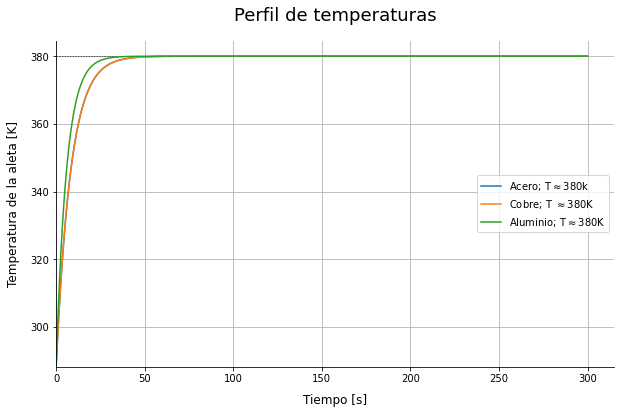

In [137]:
plt.figure(figsize=(10,6))
plt.plot(fe_time, fe_temp, label=r'Acero; T$\approx${value}k'.format(value=round(acero.figura.max())))
plt.hlines(380,0, 200, color="k", linestyle="--", linewidth=0.5 )

plt.plot(cu_time, cu_temp, label=r'Cobre; T $\approx${}K'.format(round(cobre.figura.max() )))
plt.plot(al_time, al_temp, label=r'Aluminio; T$\approx${}K'.format(round(aluminio.figura.max())))

plt.ylim(bottom=fe_temp[0])
plt.xlim(left=0)
plt.xlabel('Tiempo [s]', labelpad=10, fontsize=12)
plt.ylabel('Temperatura de la aleta [K]', labelpad=10, fontsize=12)
plt.title('Perfil de temperaturas', pad=20, fontsize=18)
plt.legend(loc='center right')
plt.grid()
sns.despine()

##Punto 1 b

Calculamos para el aluminio

In [138]:
aluminio=aleta()
aluminio.params(k=237, rho=2702, delta_t=0.02, cp=903, t_amb=380)
al_temp, al_time=aluminio.proceso(100000, 370)
al_q_in=aluminio.q_in()

Calculamos los datos para el cobre

In [139]:
cobre=aleta()
cobre.params(k=401, rho=8933, delta_t=0.02, cp=385, t_amb=380)
cu_temp, cu_time=cobre.proceso(100000, 370)
cu_q_in=cobre.q_in()

Calculamos los datos para el cobre

In [140]:
acero=aleta()
acero.params(k=63.9, rho=7832, cp=434, t_amb=380, delta_t=0.02)
fe_temp, fe_time=acero.proceso(100000, 370)
fe_q_in=acero.q_in()

Ahora hacemos las graficas del tiempo que requiere cada material para llegar a esa temperatura

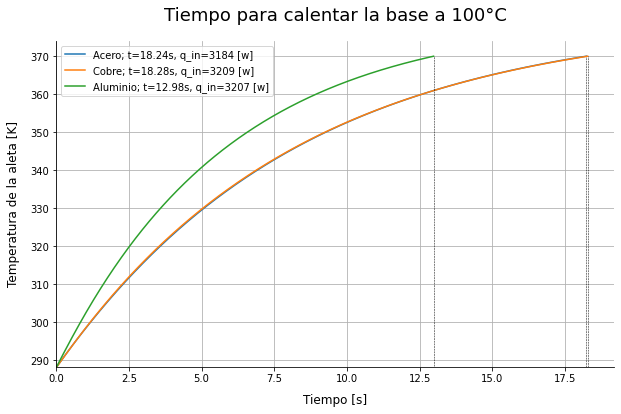

In [141]:
plt.figure(figsize=(10,6))
plt.plot(fe_time, fe_temp, label='Acero; t={}s, q_in={} [w]'.format(round(fe_time[-1], 2), round(fe_q_in)))
plt.vlines(fe_time[-1],fe_temp[0], fe_temp[-1], 'k', linestyle='--', linewidth=0.5)

plt.plot(cu_time, cu_temp, label='Cobre; t={}s, q_in={} [w]'.format(round(cu_time[-1], 3), round(cu_q_in) ))
plt.vlines(cu_time[-1],cu_temp[0], cu_temp[-1], 'k', linestyle='--', linewidth=0.5)

plt.plot(al_time, al_temp, label='Aluminio; t={}s, q_in={} [w]'.format(round(al_time[-1], 3), round(al_q_in)))
plt.vlines(al_time[-1],al_temp[0], al_temp[-1], 'k', linestyle='--', linewidth=0.5)
plt.ylim(bottom=fe_temp[0])
plt.xlim(left=0)
plt.xlabel('Tiempo [s]', labelpad=10, fontsize=12)
plt.ylabel('Temperatura de la aleta [K]', labelpad=10, fontsize=12)
plt.title('Tiempo para calentar la base a 100°C', pad=20, fontsize=18)
plt.legend()
plt.grid()
sns.despine()

##Punto 1c

In [142]:
aluminio_w=aleta()
aluminio_w.params(k=237, rho=2702, delta_t=0.02, cp=903, t_amb=380, h=1000)
al_temp_w, al_time_w=aluminio_w.proceso(100000, 370)
al_q_in_w=aluminio_w.q_in()

cobre_w=aleta()
cobre_w.params(k=401, rho=8933, delta_t=0.02, cp=385, t_amb=380, h=1000)
cu_temp_w, cu_time_w=cobre_w.proceso(100000, 370)
cu_q_in_w=cobre_w.q_in()


acero_w=aleta()
acero_w.params(k=63.9, rho=7832, cp=434, t_amb=380, delta_t=0.02, h=1000)
fe_temp_w, fe_time_w=acero_w.proceso(1000000, 370)
fe_q_in_w=acero_w.q_in()

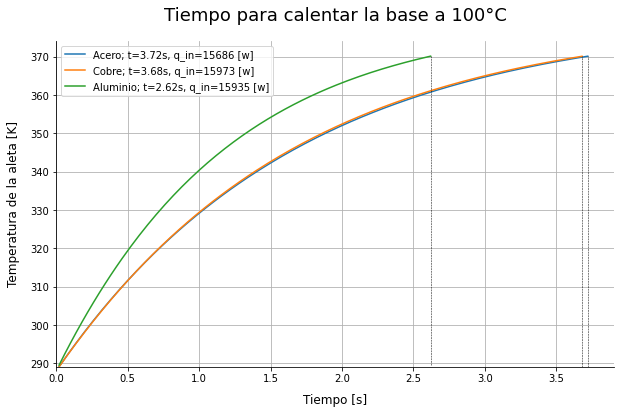

In [143]:
plt.figure(figsize=(10,6))
plt.plot(fe_time_w, fe_temp_w, label='Acero; t={}s, q_in={} [w]'.format(round(fe_time_w[-1], 2), round(fe_q_in_w)))
plt.vlines(fe_time_w[-1],fe_temp_w[0], fe_temp_w[-1], 'k', linestyle='--', linewidth=0.5)

plt.plot(cu_time_w, cu_temp_w, label='Cobre; t={}s, q_in={} [w]'.format(round(cu_time_w[-1], 3), round(cu_q_in_w) ))
plt.vlines(cu_time_w[-1],cu_temp_w[0], cu_temp_w[-1], 'k', linestyle='--', linewidth=0.5)

plt.plot(al_time_w, al_temp_w, label='Aluminio; t={}s, q_in={} [w]'.format(round(al_time_w[-1], 3), round(al_q_in_w)))
plt.vlines(al_time_w[-1],al_temp_w[0], al_temp_w[-1], 'k', linestyle='--', linewidth=0.5)
plt.ylim(bottom=fe_temp_w[0])
plt.xlim(left=0)
plt.xlabel('Tiempo [s]', labelpad=10, fontsize=12)
plt.ylabel('Temperatura de la aleta [K]', labelpad=10, fontsize=12)
plt.title('Tiempo para calentar la base a 100°C', pad=20, fontsize=18)
plt.legend()
plt.grid()
sns.despine()

#Punto 2

##Punto 2a

In [147]:
aluminio=aleta()
aluminio.params(k=237, rho=2702, delta_t=0.02, cp=903, t_amb=278, t_ini=373)
al_temp, al_time=aluminio.proceso_enf(15000, 288)

cobre=aleta()
cobre.params(k=401, rho=8933, delta_t=0.02, cp=385, t_amb=278, t_ini=373)
cu_temp, cu_time=cobre.proceso_enf(15000, 288)

acero=aleta()
acero.params(k=63.9, rho=7832, cp=434, t_amb=278, delta_t=0.02,t_ini=373)
fe_temp, fe_time=acero.proceso_enf(15000, 288)

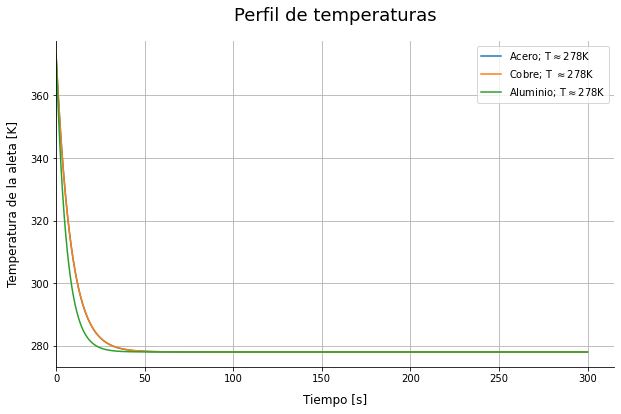

In [149]:
plt.figure(figsize=(10,6))
plt.plot(fe_time, fe_temp, label=r'Acero; T$\approx${value}K'.format(value=round(acero.figura.min())))
#plt.hlines(270,0, 200, color="k", linestyle="--", linewidth=0.5 )

plt.plot(cu_time, cu_temp, label=r'Cobre; T $\approx${}K'.format(round(cobre.figura.min(), )))


plt.plot(al_time, al_temp, label=r'Aluminio; T$\approx${}K'.format(round(aluminio.figura.min())))

#plt.ylim(bottom=fe_temp[0])
plt.xlim(left=0)
plt.xlabel('Tiempo [s]', labelpad=10, fontsize=12)
plt.ylabel('Temperatura de la aleta [K]', labelpad=10, fontsize=12)
plt.title('Perfil de temperaturas', pad=20, fontsize=18)
plt.legend(loc='upper right')
plt.grid()
sns.despine()

In [154]:
aluminio=aleta()
aluminio.params(k=237, rho=2702, delta_t=0.02, cp=903, t_amb=278, t_ini=373)
al_temp, al_time=aluminio.proceso_enf(15000, 293, False)

cobre=aleta()
cobre.params(k=401, rho=8933, delta_t=0.02, cp=385, t_amb=278, t_ini=373)
cu_temp, cu_time=cobre.proceso_enf(15000, 288, False)

acero=aleta()
acero.params(k=63.9, rho=7832, cp=434, t_amb=278, delta_t=0.02,t_ini=373)
fe_temp, fe_time=acero.proceso_enf(15000, 288, False)

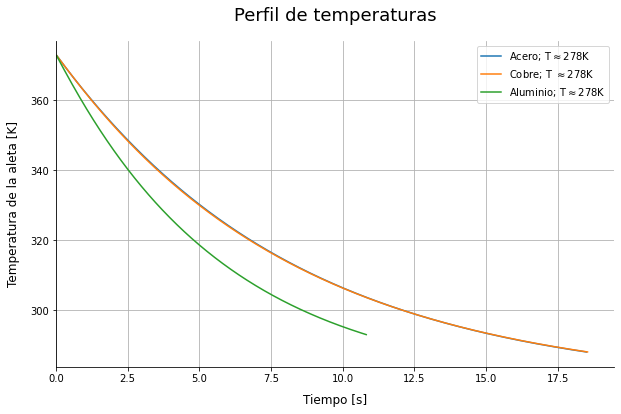

In [156]:
plt.figure(figsize=(10,6))
plt.plot(fe_time, fe_temp, label=r'Acero; T$\approx${value}K'.format(value=round(acero.figura.min())))
#plt.hlines(270,0, 200, color="k", linestyle="--", linewidth=0.5 )

plt.plot(cu_time, cu_temp, label=r'Cobre; T $\approx${}K'.format(round(cobre.figura.min(), )))


plt.plot(al_time, al_temp, label=r'Aluminio; T$\approx${}K'.format(round(aluminio.figura.min())))

#plt.ylim(bottom=fe_temp[0])
plt.xlim(left=0)
plt.xlabel('Tiempo [s]', labelpad=10, fontsize=12)
plt.ylabel('Temperatura de la aleta [K]', labelpad=10, fontsize=12)
plt.title('Perfil de temperaturas', pad=20, fontsize=18)
plt.legend(loc='upper right')
plt.grid()
sns.despine()